In [34]:
DATASET="rec.mu2e.CRV_wideband_cosmics.CRVWB-000-005-000-010.root"

In [35]:
import time
import os
from mu2etools import *
from mu2etools import wideband

In [30]:
processor = wideband.DataProcessor(usexroot=True,
                                   fixtimes=False,
                                   treename='run', 
                                   filter_name=['PEs', 'timeSinceSpill', 'spillNumber', 'eventNumber'],
                                   runlist=[1635], userunlist=True, remove=False
                                  )
ar = processor.getData(DATASET)
hep.style.use('ATLAS')  # or ATLAS/LHCb2

Text(1, 0, 'PEs')

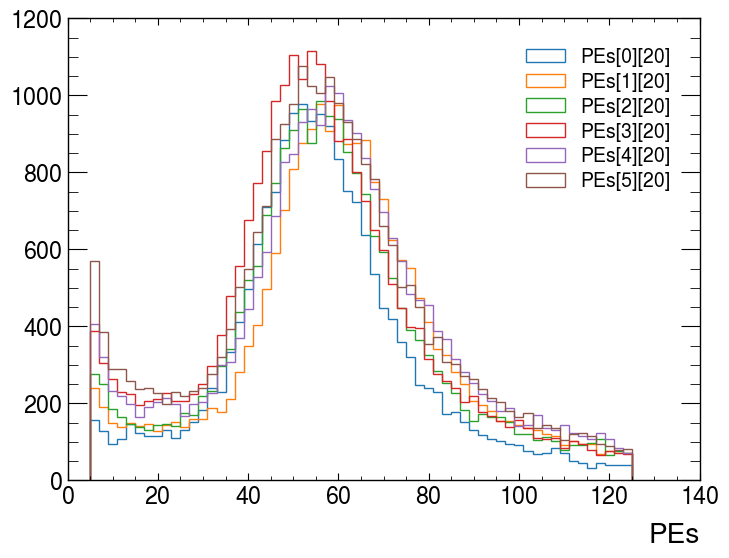

In [4]:
for feb in range(0,6):
    plt.hist(ar['PEs'][:,feb,20], histtype='step', bins=60, range=[5, 125], label='PEs[%d][20]'%feb);
plt.legend()
plt.xlabel('PEs')

In [5]:
ar

<Array [{spillNumber: 1, ...}, ..., {...}] type='380511 * {spillNumber: int...'>

In [6]:
#Mask layers in the trigger modules above the 10 PE threshold
FEB0_0 = (ak.sum(ar['PEs'][:,0,0:32], axis=-1)>10)
FEB0_1 = (ak.sum(ar['PEs'][:,0,32:64], axis=-1)>10)

FEB1_0 = (ak.sum(ar['PEs'][:,1,0:32], axis=-1)>10)
FEB1_1 = (ak.sum(ar['PEs'][:,1,32:64], axis=-1)>10)

FEB2_0 = (ak.sum(ar['PEs'][:,2,0:32], axis=-1)>10)
FEB2_1 = (ak.sum(ar['PEs'][:,2,32:64], axis=-1)>10)

FEB5_0 = (ak.sum(ar['PEs'][:,5,0:32], axis=-1)>10)
FEB5_1 = (ak.sum(ar['PEs'][:,5,32:64], axis=-1)>10)

arr_clean = ar[FEB0_0 & FEB0_1 & FEB1_0 & FEB1_1 & FEB2_0 & FEB2_1 & FEB5_0 & FEB5_1]

In [7]:
#Mask layers in the test module above the 10 PE threshold
FEB3_0 = (ak.sum(arr_clean['PEs'][:,3,0:32], axis=-1)>10)
FEB3_1 = (ak.sum(arr_clean['PEs'][:,3,32:64], axis=-1)>10)

FEB4_0 = (ak.sum(arr_clean['PEs'][:,4,0:32], axis=-1)>10)
FEB4_1 = (ak.sum(arr_clean['PEs'][:,4,32:64], axis=-1)>10)

In [8]:
nHits = ak.values_astype(FEB3_0, "int")+ \
       ak.values_astype(FEB3_1, "int")+ \
       ak.values_astype(FEB4_0, "int")+ \
       ak.values_astype(FEB4_1, "int")

In [9]:
nPass = ak.count(arr_clean[(nHits==4) | (nHits==3)]['eventNumber'])
nTrig = ak.count(arr_clean['eventNumber'])
print('3-4 efficiency: %.2f'%(nPass/nTrig*100))

3-4 efficiency: 99.96


In [10]:
nPass = ak.count(arr_clean[(nHits==4)]['eventNumber'])
nTrig = ak.count(arr_clean['eventNumber'])
print('4-4 efficiency: %.2f'%(nPass/nTrig*100))

4-4 efficiency: 98.52


Text(1, 0, 'nHits')

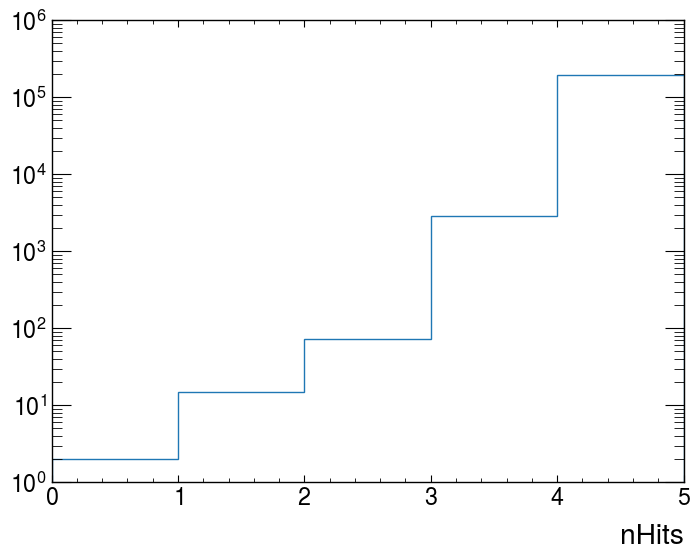

In [11]:
plt.hist(nHits, histtype='step', bins=5, range=(0,5));
plt.yscale('log')
plt.xlabel('nHits')

In [12]:
#Failed events with only one hit in CRV
arr_clean[(nHits==1)]

<Array [{spillNumber: 58, ...}, ..., {...}] type='15 * {spillNumber: int32,...'>

In [42]:
ineff_5 = []
ineff_6 = []
ineff_7 = []
ineff_8 = []

ineff_5_0 = []
ineff_6_0 = []
ineff_7_0 = []
ineff_8_0 = []

ineff_5_1 = []
ineff_6_1 = []
ineff_7_1 = []
ineff_8_1 = []

ineff_5_2 = []
ineff_6_2 = []
ineff_7_2 = []
ineff_8_2 = []

ineff_5_3 = []
ineff_6_3 = []
ineff_7_3 = []
ineff_8_3 = []

for i in range(10,140,10):

    FEB0_0 = (ak.sum(ar['PEs'][:,0,0:32], axis=-1)>i)
    FEB0_1 = (ak.sum(ar['PEs'][:,0,32:64], axis=-1)>i)

    FEB1_0 = (ak.sum(ar['PEs'][:,1,0:32], axis=-1)>i)
    FEB1_1 = (ak.sum(ar['PEs'][:,1,32:64], axis=-1)>i)

    FEB2_0 = (ak.sum(ar['PEs'][:,2,0:32], axis=-1)>i)
    FEB2_1 = (ak.sum(ar['PEs'][:,2,32:64], axis=-1)>i)

    FEB5_0 = (ak.sum(ar['PEs'][:,5,0:32], axis=-1)>i)
    FEB5_1 = (ak.sum(ar['PEs'][:,5,32:64], axis=-1)>i)
    
    nHits = ak.values_astype(FEB0_0, "int") + ak.values_astype(FEB0_1, "int") + \
            ak.values_astype(FEB1_0, "int") + ak.values_astype(FEB1_1, "int") + \
            ak.values_astype(FEB2_0, "int") + ak.values_astype(FEB2_1, "int") + \
            ak.values_astype(FEB5_0, "int") + ak.values_astype(FEB5_1, "int")

    
    for hits in range(5,9):
    
        arr_clean = ar[nHits >= hits]
    
        FEB3_0 = (ak.sum(arr_clean['PEs'][:,3,0:32], axis=-1)>i)
        FEB3_1 = (ak.sum(arr_clean['PEs'][:,3,32:64], axis=-1)>i)

        FEB4_0 = (ak.sum(arr_clean['PEs'][:,4,0:32], axis=-1)>i)
        FEB4_1 = (ak.sum(arr_clean['PEs'][:,4,32:64], axis=-1)>i)
    
        nHits_test = ak.values_astype(FEB3_0, "int") + ak.values_astype(FEB3_1, "int") + \
                     ak.values_astype(FEB4_0, "int") + ak.values_astype(FEB4_1, "int")
        
        nPass = ak.count(arr_clean[(nHits_test>=1)]['eventNumber'])
        nPass_0 = ak.count(arr_clean[FEB3_0]['eventNumber'])
        nPass_1 = ak.count(arr_clean[FEB3_1]['eventNumber'])
        nPass_2 = ak.count(arr_clean[FEB4_0]['eventNumber'])
        nPass_3 = ak.count(arr_clean[FEB4_1]['eventNumber'])
        nTrig = ak.count(arr_clean['eventNumber'])
        
        if hits == 5:
            ineff_5.append(1 - nPass/nTrig)
            ineff_5_0.append(1 - nPass_0/nTrig)
            ineff_5_1.append(1 - nPass_1/nTrig)
            ineff_5_2.append(1 - nPass_2/nTrig)
            ineff_5_3.append(1 - nPass_3/nTrig)
        if hits == 6:
            ineff_6.append(1 - nPass/nTrig)
            ineff_6_0.append(1 - nPass_0/nTrig)
            ineff_6_1.append(1 - nPass_1/nTrig)
            ineff_6_2.append(1 - nPass_2/nTrig)
            ineff_6_3.append(1 - nPass_3/nTrig)
        if hits == 7:
            ineff_7.append(1 - nPass/nTrig)
            ineff_7_0.append(1 - nPass_0/nTrig)
            ineff_7_1.append(1 - nPass_1/nTrig)
            ineff_7_2.append(1 - nPass_2/nTrig)
            ineff_7_3.append(1 - nPass_3/nTrig)
        if hits == 8:
            ineff_8.append(1 - nPass/nTrig)
            ineff_8_0.append(1 - nPass_0/nTrig)
            ineff_8_1.append(1 - nPass_1/nTrig)
            ineff_8_2.append(1 - nPass_2/nTrig)
            ineff_8_3.append(1 - nPass_3/nTrig)
        print(i, hits, nPass_0, nTrig)


10 5 262703 271554
10 6 246212 253162
10 7 222573 226525
10 8 196511 198733
20 5 261621 270460
20 6 245095 252131
20 7 221412 225461
20 8 195205 197498
30 5 261061 270002
30 6 244555 251725
30 7 220740 224881
30 8 194088 196450
40 5 260427 269614
40 6 243901 251324
40 7 219988 224369
40 8 192411 194968
50 5 259602 269273
50 6 243010 250887
50 7 218816 223626
50 8 189337 192283
60 5 258123 268800
60 6 241512 250339
60 7 217020 222741
60 8 184151 187852
70 5 255954 268176
70 6 239187 249477
70 7 214037 221133
70 8 175029 179766
80 5 251065 266874
80 6 233951 247569
80 7 205827 216017
80 8 153292 159882
90 5 237355 262989
90 6 216873 239217
90 7 176133 192978
90 8 106131 115005
100 5 202084 245465
100 6 167803 201924
100 7 110799 131378
100 8 50521 57800
110 5 135544 188167
110 6 93310 124993
110 7 48844 62493
110 8 19730 23046
120 5 71866 110969
120 6 43361 60970
120 7 20878 26658
120 8 9431 10615
130 5 38111 60080
130 6 22711 30904
130 7 11507 13838
130 8 6339 6798


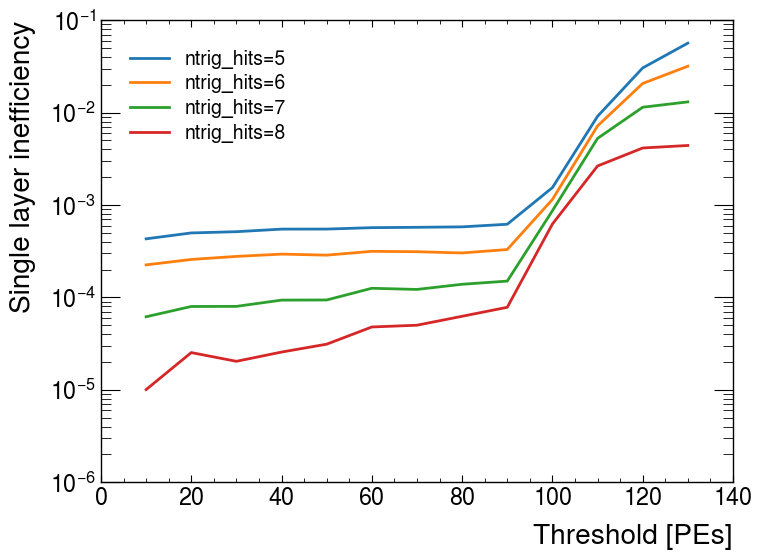

In [33]:
    
fig, ax = plt.subplots()

ax.plot(np.linspace(10, 130, 13, endpoint=True), ineff_5, label='ntrig_hits=5')
ax.plot(np.linspace(10, 130, 13, endpoint=True), ineff_6, label='ntrig_hits=6')
ax.plot(np.linspace(10, 130, 13, endpoint=True), ineff_7, label='ntrig_hits=7')
ax.plot(np.linspace(10, 130, 13, endpoint=True), ineff_8, label='ntrig_hits=8')

ax.legend()

#ax.set_ylim(0.1, 1)

ax.set_yscale('log')

ax.set_xlabel('Threshold [PEs]')
ax.set_ylabel('Single layer inefficiency')

plt.show()

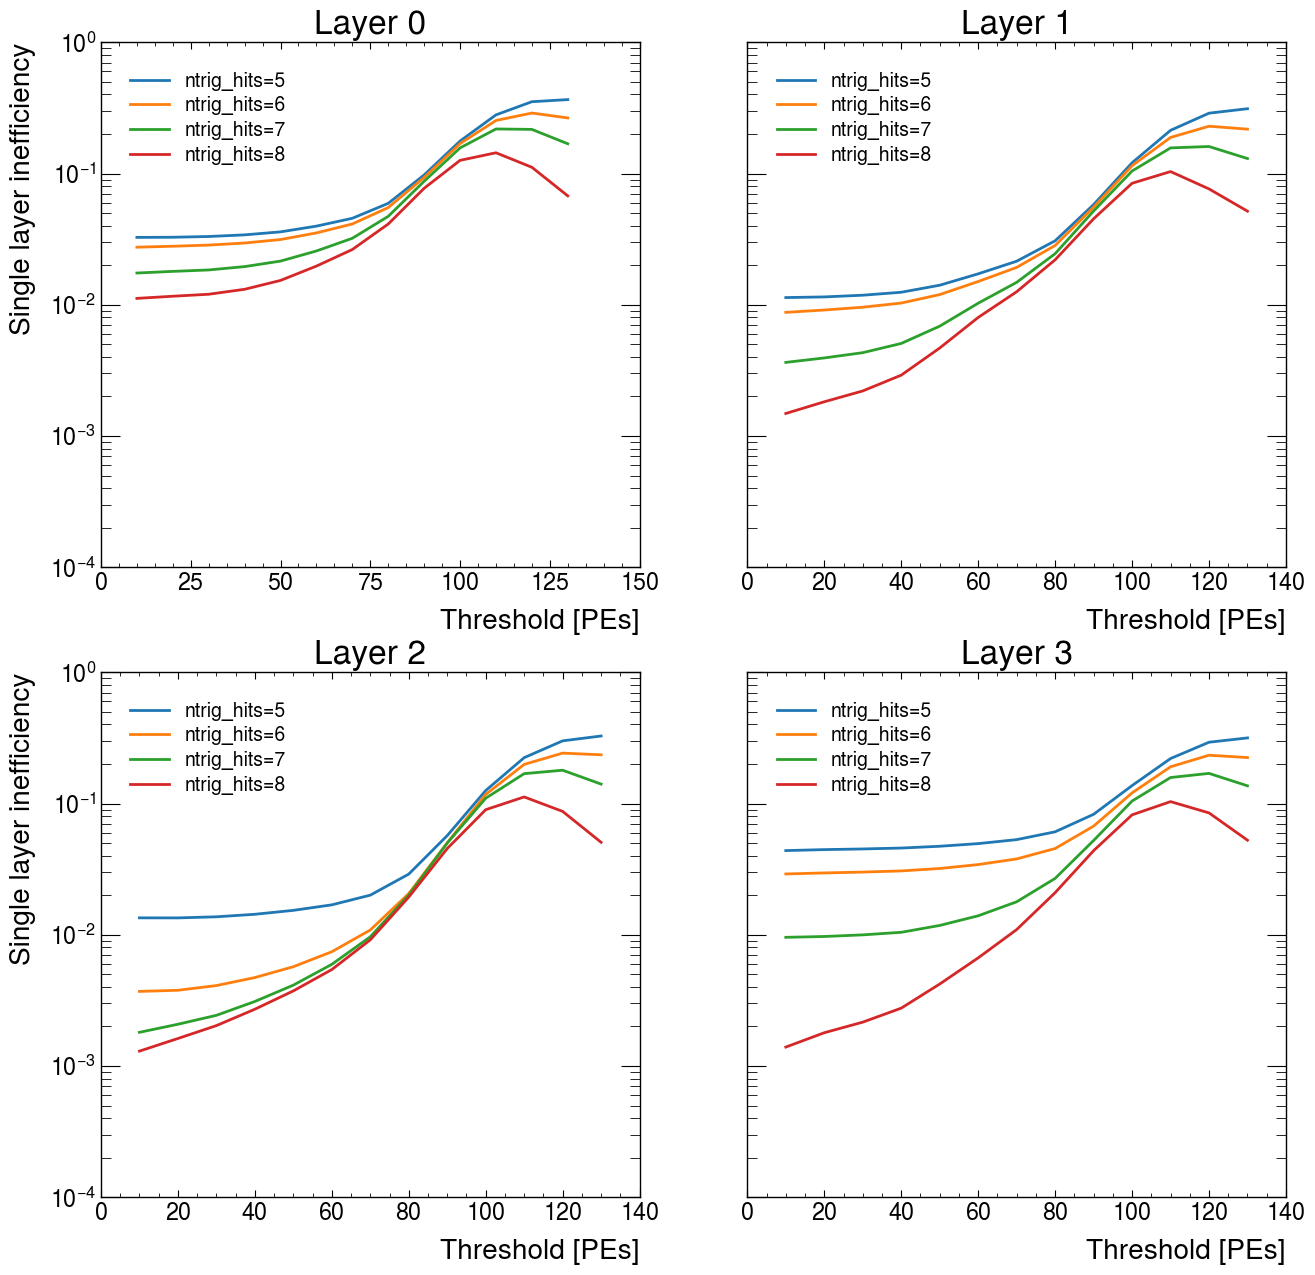

In [40]:
fig, ((ax0, ax1),(ax2, ax3)) = plt.subplots(2,2,sharey=True)

ax0.plot(np.linspace(10, 130, 13, endpoint=True), ineff_5_0, label='ntrig_hits=5')
ax0.plot(np.linspace(10, 130, 13, endpoint=True), ineff_6_0, label='ntrig_hits=6')
ax0.plot(np.linspace(10, 130, 13, endpoint=True), ineff_7_0, label='ntrig_hits=7')
ax0.plot(np.linspace(10, 130, 13, endpoint=True), ineff_8_0, label='ntrig_hits=8')
ax0.legend()
ax0.set_yscale('log')
ax0.set_xlabel('Threshold [PEs]')
ax0.set_ylabel('Single layer inefficiency')
ax0.set_title('Layer 0')

ax1.plot(np.linspace(10, 130, 13, endpoint=True), ineff_5_1, label='ntrig_hits=5')
ax1.plot(np.linspace(10, 130, 13, endpoint=True), ineff_6_1, label='ntrig_hits=6')
ax1.plot(np.linspace(10, 130, 13, endpoint=True), ineff_7_1, label='ntrig_hits=7')
ax1.plot(np.linspace(10, 130, 13, endpoint=True), ineff_8_1, label='ntrig_hits=8')
ax1.legend()
ax1.set_yscale('log')
ax1.set_xlabel('Threshold [PEs]')
ax1.set_title('Layer 1')

ax2.plot(np.linspace(10, 130, 13, endpoint=True), ineff_5_2, label='ntrig_hits=5')
ax2.plot(np.linspace(10, 130, 13, endpoint=True), ineff_6_2, label='ntrig_hits=6')
ax2.plot(np.linspace(10, 130, 13, endpoint=True), ineff_7_2, label='ntrig_hits=7')
ax2.plot(np.linspace(10, 130, 13, endpoint=True), ineff_8_2, label='ntrig_hits=8')
ax2.legend()
ax2.set_yscale('log')
ax2.set_xlabel('Threshold [PEs]')
ax2.set_ylabel('Single layer inefficiency')
ax2.set_title('Layer 2')

ax3.plot(np.linspace(10, 130, 13, endpoint=True), ineff_5_3, label='ntrig_hits=5')
ax3.plot(np.linspace(10, 130, 13, endpoint=True), ineff_6_3, label='ntrig_hits=6')
ax3.plot(np.linspace(10, 130, 13, endpoint=True), ineff_7_3, label='ntrig_hits=7')
ax3.plot(np.linspace(10, 130, 13, endpoint=True), ineff_8_3, label='ntrig_hits=8')
ax3.legend()
ax3.set_yscale('log')
ax3.set_xlabel('Threshold [PEs]')
ax3.set_title('Layer 3')

fig.set_figheight(15)
fig.set_figwidth(15)

plt.show()